In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Paramagnetism
Let's look at some data collected by Berea students for a paramagnetic alloy. The alloy this data represents is Cr$_{0.75}$CoFeNiPd$_{0.20}$. The measurement is magnetization vs. applied magnetic field and is modeled by Equation 3.32 and Figure 3.11 in the Schroeder textbook.

$$M = N\mu\tanh\left(\frac{\mu B}{kT}\right)$$

There is data for temperatures for the range $20^{\circ}C\le T \leq 135^{\circ}C$in steps of $5^{\circ}C$.

The code cell below will load the comma-separated-values file "Pudge_Magnetometry.csv". It will load into a dataframe that is handled by the library `pandas`. The first few rows will print so you can see that there are magnetization `M` and magnetic field `B` columns for these temperatures.

In [6]:
data = pd.read_csv('Pudge_Magnetometry.csv')
data.head()

,M20C,B20C,M25C,B25C,M30C,B30C,M35C,B35C,M40C,B40C,...,M115C,B115C,M120C,B120C,M125C,B125C,M130C,B130C,M135C,B135C
0,18.2282,2496.64,18.1154,2496.74,17.9464,2496.64,17.6755,2496.68,16.7563,2496.61,...,2.47144,2496.53,2.12820,2496.56,1.79364,2496.55,1.56856,2496.51,1.36556,2496.54
1,18.2287,2496.07,18.1183,2496.13,17.9468,2496.09,17.6762,2496.06,16.7564,2496.03,...,2.47091,2495.97,2.12868,2495.97,1.79346,2495.98,1.56790,2495.97,1.36508,2495.98
2,18.2294,2494.90,18.1180,2494.97,17.9476,2494.94,17.6764,2494.89,16.7559,2494.89,...,2.46985,2494.83,2.12854,2494.81,1.79290,2494.84,1.56745,2494.81,1.36376,2494.82
3,18.2296,2493.71,18.1175,2493.78,17.9470,2493.76,17.6772,2493.70,16.7549,2493.70,...,2.46916,2493.64,2.12862,2493.64,1.79235,2493.67,1.56710,2493.63,1.36229,2493.64
4,18.2312,2492.51,18.1172,2492.59,17.9461,2492.59,17.6779,2492.50,16.7552,2492.51,...,2.46826,2492.46,2.12747,2492.45,1.79165,2492.46,1.56632,2492.44,1.36223,2492.46


## Plotting all of the data
The code below will loop through all of the temperatures and plot $M$ vs. $B$ similar to Figure 3.11 in the Schroeder textbook. The difference is the data is plotted for many temperatures. It can be seen that the magnetization looks less and less like the hyperbolic tangent as the temperature increases. The magnitude of the thermal energy is greater than the magnitude of the energy of aligned spins at high temperatures. So, despite applying a large magnetic field $kT\gg\mu B$, and the spins fluctuate randomly keeping the sample from magnetizing. 

The units of the magnetism measurements are $\text{emu/g} = 10^{-3} \text{J/gT}$. Therefore, $1 \text{emu/g} = 1 \text{J/kg T}$, where the magnetic field $B$ is in Tesla (T). The conversion between Tesla and Oersted (measured in this data) is $1 \rm{Oe} = 10^{-4} \rm{T}$. This means we need to multiply our magnetic fields by $10^{-4}$ to convert to mks units later when we want energies, heat capacities, and entropies.

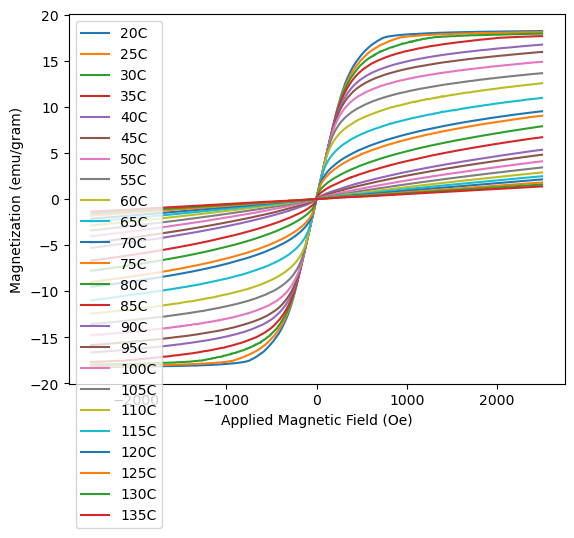

In [21]:
TC = np.arange(20, 140, 5)
for i in TC:
    Mcol = 'M'+str(i)+'C'
    Bcol = 'B'+str(i)+'C'
    plt.plot(data[Bcol], data[Mcol], label=str(i)+'C')

plt.legend()
plt.xlabel('Applied Magnetic Field (Oe)')
plt.ylabel('Magnetization (emu/gram)')
plt.show()

### Plot Individual Temperatures
Try plotting individual temperatures on your own in the code cell below. The 20$^{\circ}$C data is plotted as an example. See how the curves change. You might plot 20$^{\circ}$C and 135$^{\circ}$C together to see the total change over the temperatures measured.

Next, look at how the $\tanh$ model fits the data. Return the plot to plot 20$^{\circ}$C. The add the model plot. You will need to adjust the parameters `A` and `B` to get the model to fit.

```python
A = 5
B = 100
model20C = 5*np.tanh(data['B20C']/100)
plt.plot(data['B20C'], model20C, '-r', label='model')
```

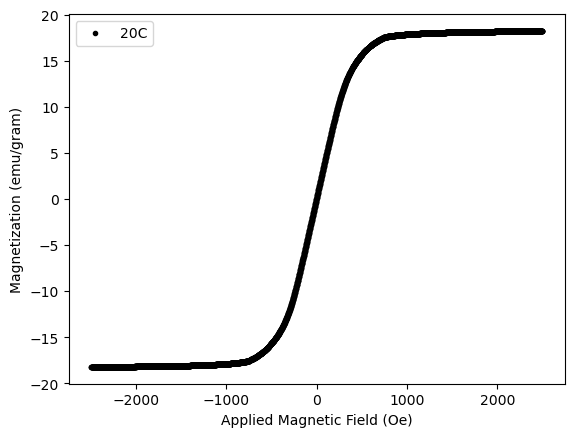

In [70]:
plt.plot(data['B20C'], data['M20C'], '.k', label='20C')
plt.legend()
plt.xlabel('Applied Magnetic Field (Oe)')
plt.ylabel('Magnetization (emu/gram)')
plt.show()

## Magnetization vs. Temperature
We can select a row of data that corresponds to a particular applied magnetic field. If we slice across the different temperatures, we will see how the magnetization changes with temperature. This is equivalent to Figure 3.10 in the textbook. We can look at different applied magnetic fields by changing which row we choose. In the code cell below, you can change the `row` between 0 and 4000 and see what the magnetic field is. The plot will show you how the magnetization changes with temperature at that magnetic field.

* Slice through the temperature dependence to get M vs. T.
    * Fig. 3.10
* Then, M*B vs. T is U vs. T
* dU/dT vs. T is CV vs T
    * Fig. 3.10
* S = dM/dT*dH. plot vs. T

The magnetic field is B =  0.249664 T


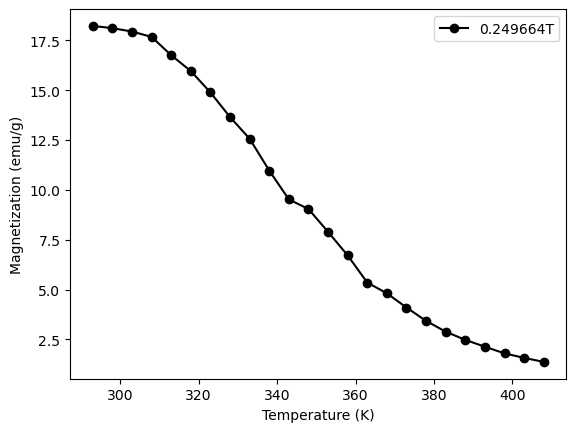

In [123]:
row = 0
Bfield = data['B20C'].iloc[row]*1e-4
print("The magnetic field is B = ", Bfield, "T")
MvT = np.zeros(len(TC))
ind = 0
for i in TC:
    Mcol = 'M'+str(i)+'C'
    Bcol = 'B'+str(i)+'C'
    MvT[ind] = data[Mcol].iloc[row]#loc[(data[Bcol] > 2496) & (data[Bcol]<2497)])
    ind += 1
    
plt.plot(TC+273, MvT, '-ok', label=str(Bfield)+'T')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization (emu/g)')
plt.legend()
plt.show()

## Energy vs. Temperature
According to equation 3.26
$$|M| = \left|\frac{U}{B}\right|$$
Rearranging,
$$U = \left|MB\right|$$

The negative sign in the textbook is because spin magnetic moments aligned with a megnetic field are stable and therefore have negative energy. We only care about the magnitudes here. Below, we plot the energy vs. temperature like that shown in figure 3.9 except we will flip the axes. if you want to change the magnetic field go back to run the code cell above for a different field and then run the code cell below.

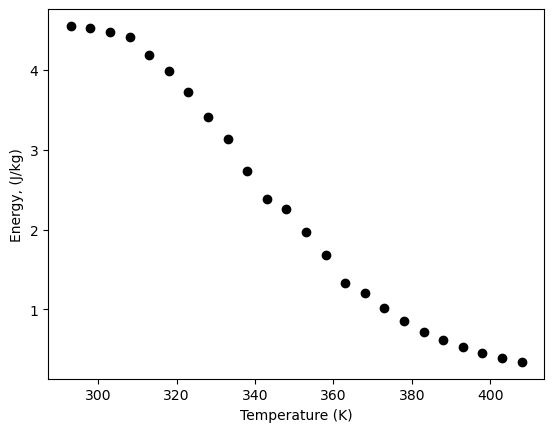

In [110]:
plt.plot(TC+273, MvT*Bfield, 'ok')
plt.xlabel('Temperature (K)')
plt.ylabel('Energy, (J/kg)')
plt.show()

## Heat Capacity vs. Temperature
The heat capacity is

$$C_V = \left(\frac{\partial U}{\partial T}\right)_V$$

and this derivative is

$$C_V = \left(\frac{\partial MB}{\partial T}\right)_V = B\left(\frac{\partial M}{\partial T}\right)_V$$

We can calculate a derivative of the magnetization numerically using the `gradient` function in `numpy`. This is done by the command

```python
Cv = np.gradient(MvT)
```

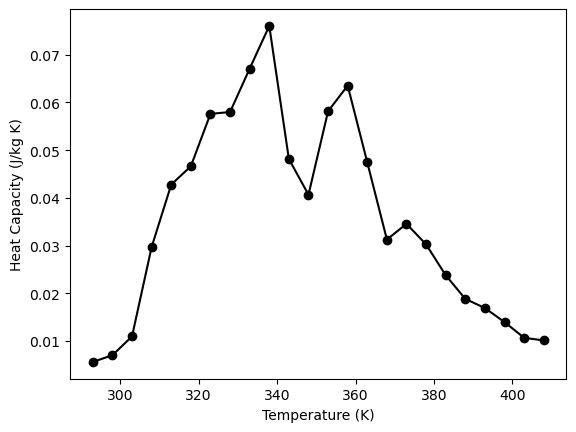

In [121]:
Cv=np.gradient(MvT, 5)*-Bfield
plt.plot(TC+273,Cv, '-ok')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/kg K)')
plt.show()

### The Result
Don't take the values of the heat capacity too seriously. We did not account for the molar mass of the material. The heat capacity scales with the number of atoms $Nk$, and we have not properly accounted for this to get absolute values of the heat capacity in J/kgK. For reference, metals typically have heat capacities of several hundred J/gK or several tenths of J/kgK.

The textbook solves for the theoretical heat capacity at constant $N$ and $B$, which is what we have plotted above. 

$$\begin{align}
C &= \left(\frac{\partial U}{\partial T}\right)_{N,B}\\
&= \frac{\partial}{\partial T}\left(-N\mu B\tanh\left(\frac{\mu B}{kT}\right)\right)\\
&= Nk\frac{\left(\mu B/kT\right)^2}{\cosh^2\left(\mu B/kT\right)}
\end{align}$$

We can plot this along with our experimental heat capacity. Below the code will make this plot. You will need to adjust `muBk` and `Nk`, which is adjusting the magnetic strength of the material $\mu B/k$ and the number of atoms $Nk$ so that the theory lines up with the experiment. You'll see the theoretical model looks similar in shape, but there is quite a bit of difference between the theory and experiment.

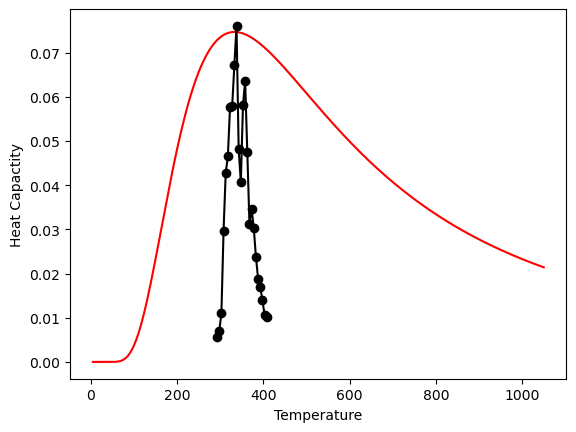

In [147]:
muBk = 400
Nk = 0.17
TK = np.arange(5, 1055, 5)
CBtheory = Nk*(muBk/(TK))**2/(np.cosh(muBk/(TK)))**2
plt.plot(TK, CBtheory,'-r')
plt.plot(TC+273, Cv, '-ok')
plt.xlabel('Temperature')
plt.ylabel('Heat Capactity')
plt.show()

## Entropy
The entropy change is written

$$\Delta S = \int_{T_i}^{T_f}\frac{C_V}{T}dT$$

We see the heat capacity above is not constant. Thus, we need to calculate $dS$ over each temperature interval.

$$dS = \frac{C_V}{T} dT$$

Keep in mind that this is entropy vs. temperature and **NOT** the entropy like Figure 3.8, which is entropy vs. energy. This plot tells us that the entropy is maximized at the inflection point of the magnetization vs. temperature. This inflection point is the temperature at which approximately half the spins align with the magnetic field and the other half are randomly oriented. This temperature is called the Curie Temperature. In materials engineering, we try to synthesize materials with particular Curie temperatures. Ideally, the entropy vs. temperature has a high, sharp peak. If the peak is high and sharp, the paramagnet is a good material for refrigeration. 

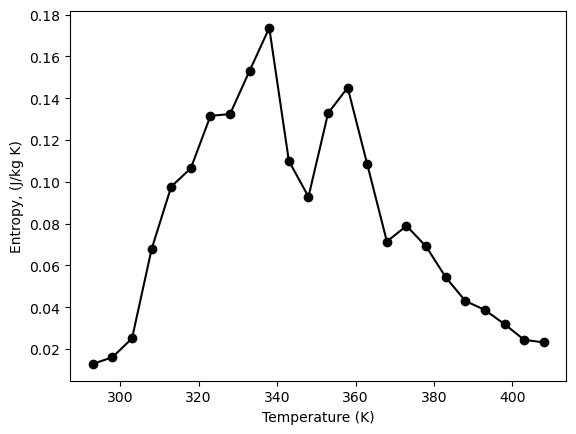

In [122]:
dH = np.abs(data['B20C'].iloc[1]-data['B20C'].iloc[0])#*1e-4
DS = Cv/(TC+273)*5
DS = Cv/Bfield*dH
plt.plot(TC+273, DS, '-ok')
plt.xlabel('Temperature (K)')
plt.ylabel(r'Entropy, (J/kg K)')
plt.show()